### Exploring Data

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
os.chdir('C:/Users/dalto/OneDrive/Pictures/Documents/Emory/NFL Lab/data')

In [2]:
df = pd.read_csv('2023_tracking.csv')

In [57]:
df['play_direction'] = df['play_direction'].str.strip().str.lower()
df.loc[df['play_direction'] == 'left', 'y'] = 53.3 - df.loc[df['play_direction'] == 'left', 'y']
df.loc[df['play_direction'] == 'left', 'x'] = 120 - df.loc[df['play_direction'] == 'left', 'x']

In [3]:
random_groups = df.groupby(['play_id_n', 'nfl_id']).size().sample(n=25, random_state=1).index

In [4]:
df_predict = df[df.set_index(['play_id_n', 'nfl_id']).index.isin(random_groups)].reset_index(drop=True)

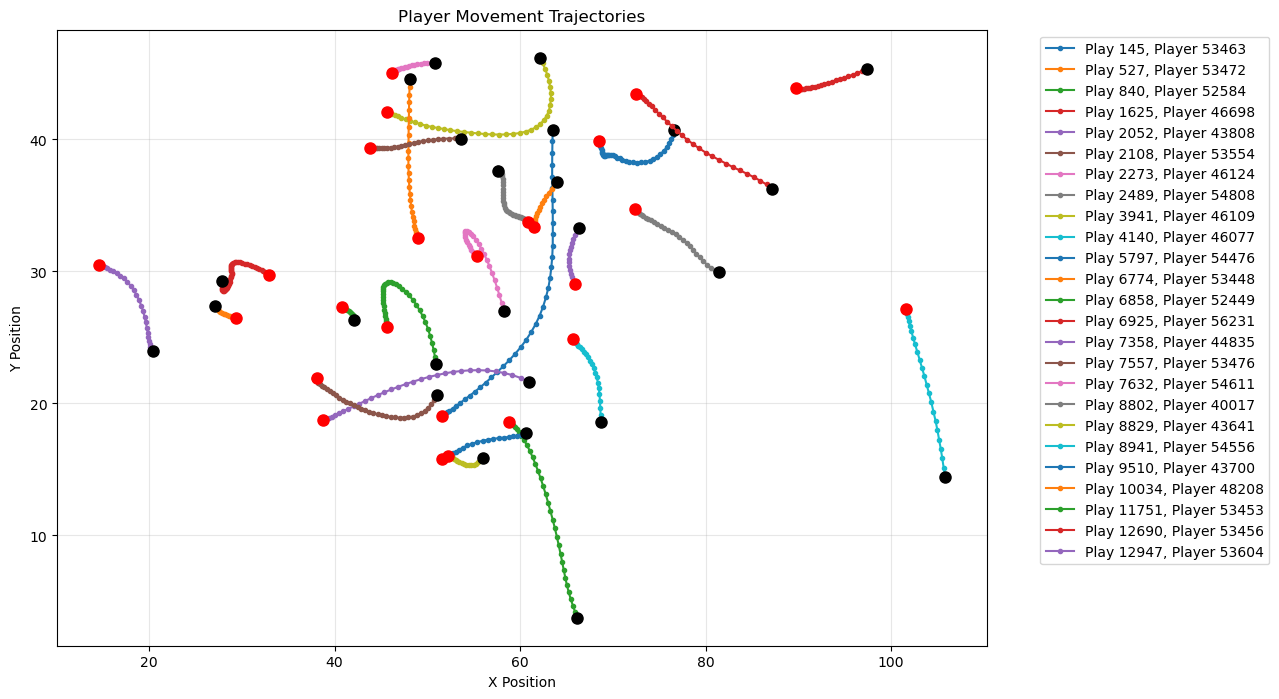

In [5]:
plt.figure(figsize=(12, 8))

for (play_id, nfl_id), group in df_predict.groupby(['play_id_n', 'nfl_id']):
    plt.plot(group['x'], group['y'], marker='o', markersize=3, label=f'Play {play_id}, Player {nfl_id}')
    
    plt.plot(group['x'].iloc[0], group['y'].iloc[0], marker='o', markersize=8, color='red')
    
    plt.plot(group['x'].iloc[-1], group['y'].iloc[-1], marker='o', markersize=8, color='black')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Player Movement Trajectories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df.to_csv('2023_tracking_norm.csv')